In [1]:
!pip install fastai==2.7.9
!pip install fastkaggle==0.0.7
!pip install fasterai==0.1.11
!pip install ipython-autotime==0.3.1
!pip install torch==1.12.1
%load_ext autotime

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.5/225.5 kB 8.2 MB/s eta 0:00:00
  Attempting uninstall: fastai
    Found existing installation: fastai 2.7.11
    Uninstalling fastai-2.7.11:
      Successfully uninstalled fastai-2.7.11
/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.3/776.3 MB 784.7 kB/s eta 0:00:0000:0100:01
  Attempting uninstall: torch
    Found existing installation: torch 1.12.0
    Uninstalling torch-1.12.0:
      Successfully uninstalled torch-1.12.0
/bin/bash: /opt/conda/lib/libtin

In [3]:
from fastai.vision.all import *
from fastai.callback.all import *
from fastai.data.all import *
from fastai.imports import *
from fastai.torch_core import *
from fastai.learner import *
from fastai.fp16_utils import *

from fasterai.sparse.all import *
from fasterai.core.criteria import *
from fasterai.regularize.all import *

from fastkaggle import *

import torch
import torch.nn as nn
import torch.nn.functional as F


set_seed(42)

time: 1.44 s (started: 2023-05-01 05:16:24 +00:00)


In [4]:
@patch
def custom_plot_losses(self: Recorder, skip_start=5, with_valid=True, filename="temp.txt"):
    fig2 = plt.figure("Figure 2")

    idx = (np.array(self.iters)<skip_start).sum()
    train_col = self.metric_names.index('train_loss') - 1 
    plt.plot(self.iters[idx:], L(self.values[idx:]).itemgot(train_col), label='train loss')
    plt.legend()
    if with_valid:
        idx = (np.array(self.iters)<skip_start).sum()
        valid_col = self.metric_names.index('valid_loss') - 1 
        plt.plot(self.iters[idx:], L(self.values[idx:]).itemgot(valid_col), label='valid loss')
        plt.legend()

    
@patch
def custom_plot_values(self: Recorder, skip_start=5, with_valid=True):
    fig3 = plt.figure("Figure 3")
    
    idx = (np.array(self.iters)<skip_start).sum()
    train_col = self.metric_names.index('train_accuracy') - 1 
    plt.plot(self.iters[idx:], L(self.values[idx:]).itemgot(train_col), label='train accuracy')

    plt.legend()
    if with_valid:
        idx = (np.array(self.iters)<skip_start).sum()
        valid_col = self.metric_names.index('valid_accuracy') - 1 
        plt.plot(self.iters[idx:], L(self.values[idx:]).itemgot(valid_col), label='valid accuracy')
        plt.legend()

time: 2.57 ms (started: 2023-05-01 05:16:26 +00:00)


In [5]:
comp = 'paddy-diseases/paddy-diseases'

path = setup_comp(comp, install='"fastcore>=1.4.5" "fastai>=2.7.1" "timm>=0.6.2.dev0"')

time: 17.7 s (started: 2023-05-01 05:16:26 +00:00)


In [6]:
dls = ImageDataLoaders.from_folder(path/"train", 
                                   valid_pct=0.25, 
                                   item_tfms=Resize(256), 
                                   batch_tfms=aug_transforms(   size=64, 
                                                                min_scale=0.75,
                                                                max_rotate=10., 
                                                                min_zoom=0.8, 
                                                                max_zoom=1.2, 
                                                            
                                                            ), 
                                   bs=32)

time: 10.7 s (started: 2023-05-01 05:16:44 +00:00)


In [7]:
sp_cb=[
#       GradientAccumulation(32), 
      SparsifyCallback(sparsity=50, 
                         granularity='filter', 
                         context='local', 
                         criteria=large_final, 
                         schedule=one_cycle),


]

time: 973 µs (started: 2023-05-01 05:16:54 +00:00)


In [8]:
model = vgg16_bn(num_classes=10)


time: 3.39 s (started: 2023-05-01 05:16:54 +00:00)


In [9]:
learn = Learner(dls, 
                model, 
                metrics=[accuracy,
                         error_rate,
                        ])
learn.unfreeze()
learn.recorder.train_metrics = True
learn.path = Path("/kaggle/working/")

time: 14.5 ms (started: 2023-05-01 05:16:58 +00:00)


Pruning of filter until a sparsity of [50]%
Saving Weights at epoch 0


epoch,train_loss,train_accuracy,train_error_rate,valid_loss,valid_accuracy,valid_error_rate,time
0,2.249583,0.183013,0.816987,2.060824,0.289904,0.710096,02:27
1,2.174532,0.209936,0.790064,2.013258,0.292788,0.707212,02:07
2,2.072814,0.244551,0.755449,1.981084,0.306250,0.693750,02:06
3,2.053551,0.259455,0.740545,1.931984,0.345192,0.654808,01:57
4,2.033131,0.277724,0.722276,1.906195,0.320192,0.679808,02:11
5,1.990482,0.296314,0.703686,1.843918,0.390865,0.609135,02:08
6,1.945100,0.314744,0.685256,1.794359,0.389423,0.610577,01:15
7,1.900778,0.335737,0.664263,1.736689,0.413462,0.586538,01:16
8,1.825565,0.356891,0.643109,1.658482,0.429808,0.570192,01:52
9,1.796359,0.373878,0.626122,1.607971,0.462019,0.537981,02:09


Sparsity at the end of epoch 0: [0.14]%
Sparsity at the end of epoch 1: [0.16]%
Sparsity at the end of epoch 2: [0.19]%
Sparsity at the end of epoch 3: [0.22]%
Sparsity at the end of epoch 4: [0.25]%
Sparsity at the end of epoch 5: [0.29]%
Sparsity at the end of epoch 6: [0.33]%
Sparsity at the end of epoch 7: [0.38]%
Sparsity at the end of epoch 8: [0.43]%
Sparsity at the end of epoch 9: [0.5]%
Sparsity at the end of epoch 10: [0.57]%
Sparsity at the end of epoch 11: [0.66]%
Sparsity at the end of epoch 12: [0.75]%
Sparsity at the end of epoch 13: [0.86]%
Sparsity at the end of epoch 14: [0.99]%
Sparsity at the end of epoch 15: [1.14]%
Sparsity at the end of epoch 16: [1.3]%
Sparsity at the end of epoch 17: [1.49]%
Sparsity at the end of epoch 18: [1.71]%
Sparsity at the end of epoch 19: [1.96]%
Sparsity at the end of epoch 20: [2.24]%
Sparsity at the end of epoch 21: [2.56]%
Sparsity at the end of epoch 22: [2.92]%
Sparsity at the end of epoch 23: [3.33]%
Sparsity at the end of epoch

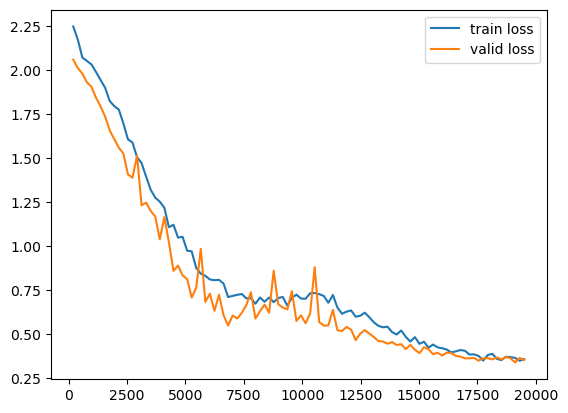

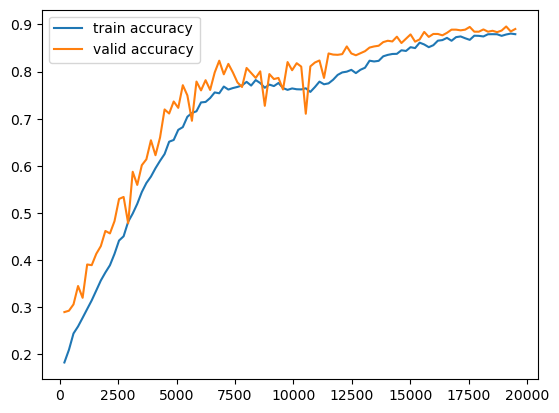

time: 2h 11min 37s (started: 2023-05-01 05:16:58 +00:00)


In [10]:
learn.fit_one_cycle(100, 3e-5, cbs=sp_cb)
                    
learn.recorder.custom_plot_losses()
learn.recorder.custom_plot_values()

In [11]:
learn.export(Path("/kaggle/working/VGG16_bn_sparse50.pkl"))

time: 1.64 s (started: 2023-05-01 07:28:35 +00:00)


In [21]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters())

time: 939 µs (started: 2023-05-01 07:36:47 +00:00)


In [22]:
count_parameters(learn.model)


134309962

time: 9.06 ms (started: 2023-05-01 07:36:47 +00:00)


In [23]:
pruner = Pruner()
pruned_model = pruner.prune_model(learn.model)

time: 41.9 ms (started: 2023-05-01 07:36:47 +00:00)


In [24]:
pruned_learn = Learner(dls, pruned_model.cuda(), metrics=accuracy)


time: 3.46 ms (started: 2023-05-01 07:36:47 +00:00)


In [25]:
pruned_learn.validate()

(#2) [0.3524021506309509,0.8903846144676208]

time: 17.6 s (started: 2023-05-01 07:36:47 +00:00)


In [26]:
count_parameters(pruned_learn)

71890986

time: 3.7 ms (started: 2023-05-01 07:37:05 +00:00)


In [27]:
pruned_learn.export(Path("/kaggle/working/VGG16_bn_sparse50_pruned.pkl"))

time: 864 ms (started: 2023-05-01 07:37:05 +00:00)
